In [1]:
from dataset import GDSDataset, Sample, samples_to_np
from synthesis import DataFactory
import matplotlib.pyplot as plt
import numpy as np

from typing import Union, List, Tuple, Any

In [2]:
# define some helpler plotting functions

def plot_traj(traj: Union[Sample, Tuple[np.ndarray, Union[str, int]], Any]):
    if isinstance(traj, Sample):
        traj = traj.trajectory
    elif isinstance(traj, tuple):
        traj = traj[0]
    traj = np.array(traj)
    plt.plot(traj[:, 0], traj[:, 1], 'o-')
    plt.show()

def plot_trajs(trajs: List[Union[Sample, Tuple[np.ndarray, Union[str, int]], Any]], filter: Union[str, int] = None):
    fig, ax = plt.subplots()
    for traj in trajs:
        if isinstance(traj, Sample):
            traj = traj.trajectory
        elif isinstance(traj, tuple):
            traj = traj[0]
        traj = np.array(traj)
        ax.plot(traj[:, 0], traj[:, 1], 'o-')

In [3]:
ds = GDSDataset("./", sub_idx=1)
print(ds)

Loading dataset from ./xml_logs
Dataset: gds
Subjects: 1
Gesture types: 16
Samples: 480


### Test plotting

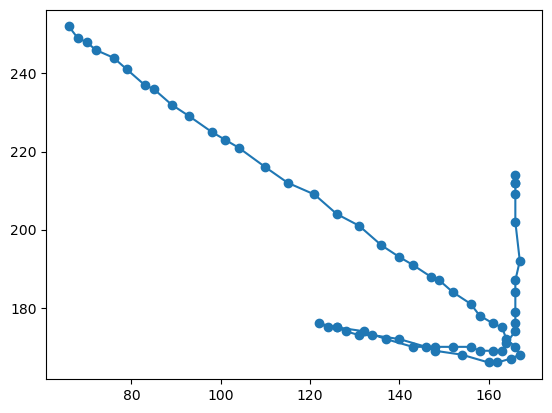

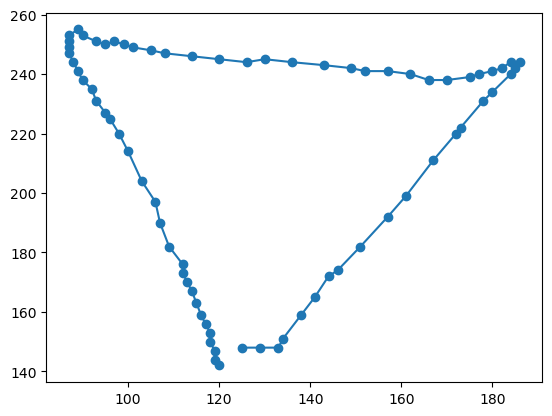

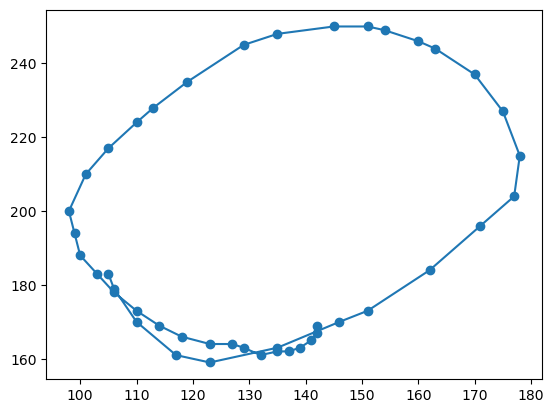

In [4]:
# test plot sample
plot_traj(ds.samples[0])

# test plot tuple
plot_traj(samples_to_np([ds.samples[451]])[0])

# test plot np.ndarray
plot_traj(ds.samples[38].trajectory)

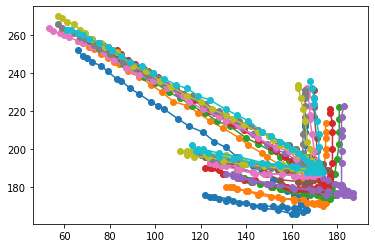

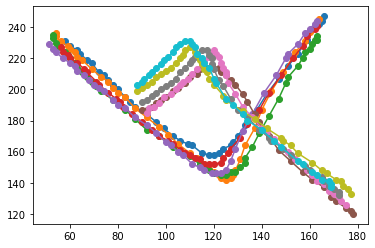

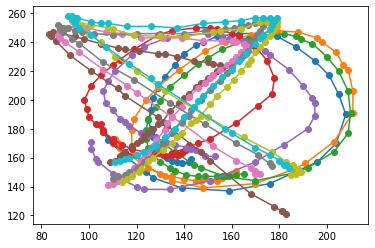

In [5]:
# test plot list of samples
plot_trajs(ds.samples[:10])

# test plot list of tuples
plot_trajs(samples_to_np(ds.samples[15:25]))

# test plot list of np.ndarray
plot_trajs([s.trajectory for s in ds.samples[35:45]])

### Test generation

In [4]:
sample_subset = ds.samples[:10]

In [5]:
samples_subset = samples_to_np(sample_subset)
print(np.mean([len(s[0]) for s in samples_subset]))

65.3


In [6]:
# synth = DataFactory.generate_chain(sample_subset, ["spatial", "scale"], n=12)
synth = DataFactory.generate_chain(sample_subset, ["frame-jitter", "frame-skip", "duplicate", "scale", "temporal", "rotate", "shear", "perspective"], n=12)

print(len(synth))

120


In [7]:
lengths = [len(s[0]) for s in synth]
print(np.mean(lengths))

32.416666666666664


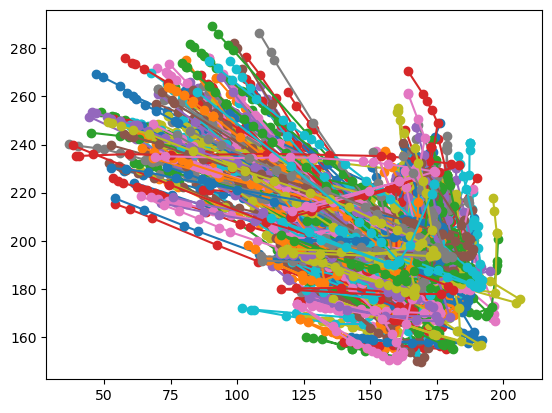

In [8]:
plot_trajs(synth)

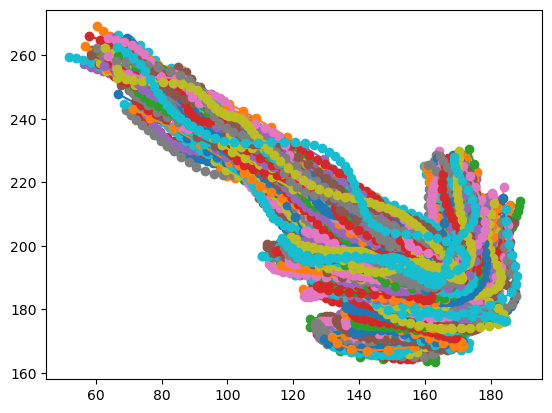

In [9]:
synth = DataFactory.generate_chain(sample_subset, ["bezier"], n=12)
plot_trajs(synth)

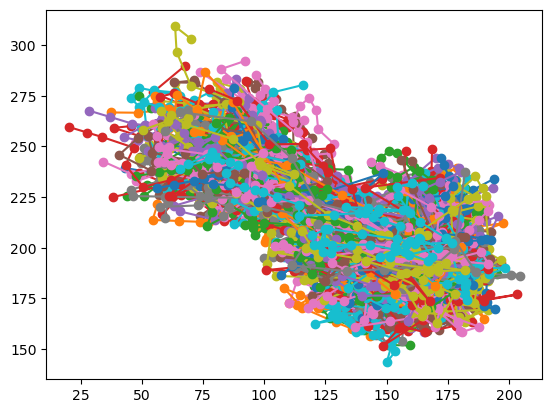

In [10]:
synth = DataFactory.generate_avc(sample_subset, n=12)
plot_trajs(synth)

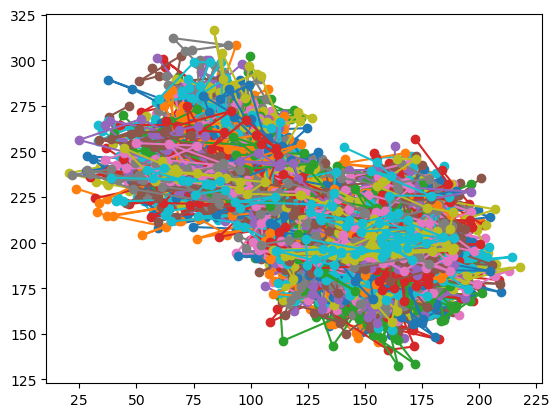

In [11]:
synth = DataFactory.generate_simple(sample_subset, n=12)
plot_trajs(synth)

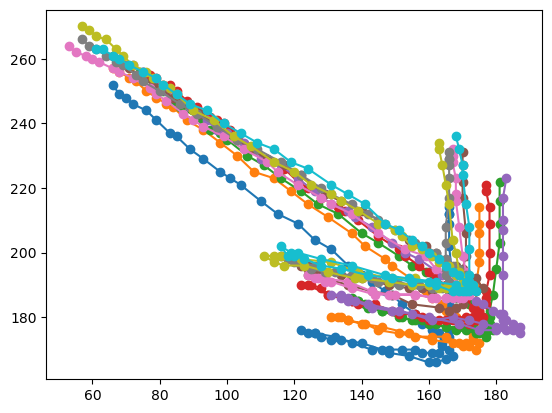

In [12]:
plot_trajs(samples_subset)

### Test splitting

In [4]:
ds = GDSDataset("./", sub_idx=2)
train, val, test = ds.ud_split(k=1, fixed=True)

Loading dataset from ./xml_logs
